In [84]:
# load packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# import
filepath = 'data/resources.csv'
filepath2 = 'data/train.csv'
filepath3 = 'data/test.csv'
rdf = pd.read_csv(filepath)
tdf = pd.read_csv(filepath2)
tedf = pd.read_csv(filepath3)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tedf.shape

(78035, 15)

In [4]:
def calc_total_cost(data, cost):
    # merge (note choice of inner)
    data = pd.merge(data, cost, how = 'inner', on = 'id')
    return(data)

In [5]:
# sum resources by id
rdf['total_cost'] = rdf.quantity * rdf.price
rdf.drop(['price', 'quantity'], inplace = True, axis = 1)

In [6]:
# calculate cost by id
total_cost = rdf.groupby(['id'], as_index = False).sum()

In [7]:
total_cost.head()

,id,total_cost
0,p000001,833.63
1,p000002,630.28
2,p000003,298.97
3,p000004,1126.22
4,p000005,702.31


In [8]:
# merge total cost onto test and train datasets
train_df = calc_total_cost(tdf, total_cost)
test_df = calc_total_cost(tedf, total_cost)

In [18]:
l = LogisticRegression()

In [19]:
train_df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,total_cost
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,899.94
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,400.00
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,469.99
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,684.47
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,711.00


In [80]:
X = train_df[['teacher_number_of_previously_posted_projects','total_cost']]
y = train_df['project_is_approved']

In [81]:
l.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
preds = l.predict(test_df[['teacher_number_of_previously_posted_projects','total_cost']])

In [68]:
preds.shape

(78035,)

In [69]:
preds_df = pd.DataFrame(preds)

In [70]:
preds_df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [71]:
preds_df.columns = ['prediction']

In [72]:
preds_df.head()

,prediction
0,1
1,1
2,1
3,1
4,1


In [83]:
preds_df.prediction.value_counts()

1    78035
Name: prediction, dtype: int64

In [64]:
train_df.project_is_approved.value_counts()

1    154346
0     27734
Name: project_is_approved, dtype: int64

In [91]:
h = 1

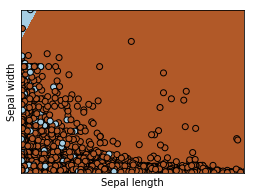

In [94]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('prior projects')
plt.ylabel('total cost')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()